# PySpark Customer Churn Analysis

## Project Description

in this project , we will use PySpark to analyze customer behavior and find the patterns that may indicate customer churn. you will process and clean a telecommunications dataset,. we will create a useful features like, tenure, contract type and monthly charges, and we will use Spark's aggregation fuctions to extract insights on cutomer churn trends.in the end , we will visualize a key churn indicators using Matplotlib and Seaborn

## Project Overview
This project demonstrates how to process and analyze large datasets using PySpark, focusing on employees data. Tasks include data loading, cleaning, exploration, and aggregation, culminating in insights on employee salaries and demographics.

### About the Dataset
**telecom_customers.csv** (with columns like customerID, gender, SeniorCitizen, Partner, tenure, MonthlyCharges, Contract, PaymentMethod, Churn)



# Objectives 
- Set up PySapark env 
- Load and Clean the datasets
- Calculate tenure and classify cutomer by risk of churn
- summarize churn cross different contract types, payent methods, and seniority levels using aggregations
- visualize churn rates with bar plots/heatmaps

# Task One: Set up and overview of the project
In this task, you will get an overview of the project and set up the PySpark environment.

In [7]:
## Install libaries
!pip install pandas matplotlib seaborn pyspark


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: C:\Users\merly\Documents\01_App\12_Python\File 3.11\python.exe -m pip install --upgrade pip


In [8]:
## Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, avg, max, min, countDistinct, sum, round

In [9]:
## Set up PySpark environment
from pyspark.sql import SparkSession

In [10]:
## Initialize the SparkSession
spark=(SparkSession.builder\
    .appName("Pyspark customer")\
    .getOrCreate()
)
## Verify that SparkSession is created
spark

# Task Two: Load the data
In this task, you will load the employees.csv and updated_salaries.csv data.

In [11]:
## Load the Telco_customer_churn.csv dataset
try :
    data=spark.read.format('csv')\
    .option("header","True")\
    .option("infraschema","True")\
    .load("Telco_customer_churn.csv")

    print("data loaded successfully")
except Exception as e:
    print ("error : " ,e)
    

data loaded successfully


In [12]:
## Show the first few rows of the Telco_customer_churn data
data.show(5)

+----------+-----+-------------+----------+-----------+--------+--------------------+---------+-----------+------+--------------+-------+----------+-------------+-------------+--------------+----------------+---------------+-------------+-----------------+------------+------------+----------------+--------------+-----------------+--------------------+---------------+-------------+-----------+-----------+-----------+----+--------------------+
|CustomerID|Count|      Country|     State|       City|Zip Code|            Lat Long| Latitude|  Longitude|Gender|Senior Citizen|Partner|Dependents|Tenure Months|Phone Service|Multiple Lines|Internet Service|Online Security|Online Backup|Device Protection|Tech Support|Streaming TV|Streaming Movies|      Contract|Paperless Billing|      Payment Method|Monthly Charges|Total Charges|Churn Label|Churn Value|Churn Score|CLTV|        Churn Reason|
+----------+-----+-------------+----------+-----------+--------+--------------------+---------+-----------+-

In [14]:
## Print the schema for Telco_customer_churn data
data.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- Count: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Zip Code: string (nullable = true)
 |-- Lat Long: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Senior Citizen: string (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Tenure Months: string (nullable = true)
 |-- Phone Service: string (nullable = true)
 |-- Multiple Lines: string (nullable = true)
 |-- Internet Service: string (nullable = true)
 |-- Online Security: string (nullable = true)
 |-- Online Backup: string (nullable = true)
 |-- Device Protection: string (nullable = true)
 |-- Tech Support: string (nullable = true)
 |-- Streaming TV: string (nullable = true)
 |-- Streaming Movies: string (nullable = true)
 |-- Contract: st

# Task Three: Explore the data
In this task, you will explore the salaries data by computing summary statistics and visualizing the salary column.

In [20]:
## Create a sum of missing values per column in the Telco_customer_churn data
data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns]).show()

+----------+-----+-------+-----+----+--------+--------+--------+---------+------+--------------+-------+----------+-------------+-------------+--------------+----------------+---------------+-------------+-----------------+------------+------------+----------------+--------+-----------------+--------------+---------------+-------------+-----------+-----------+-----------+----+------------+
|CustomerID|Count|Country|State|City|Zip Code|Lat Long|Latitude|Longitude|Gender|Senior Citizen|Partner|Dependents|Tenure Months|Phone Service|Multiple Lines|Internet Service|Online Security|Online Backup|Device Protection|Tech Support|Streaming TV|Streaming Movies|Contract|Paperless Billing|Payment Method|Monthly Charges|Total Charges|Churn Label|Churn Value|Churn Score|CLTV|Churn Reason|
+----------+-----+-------+-----+----+--------+--------+--------+---------+------+--------------+-------+----------+-------------+-------------+--------------+----------------+---------------+-------------+---------

In [24]:
##clean null
data_clean=data.na.drop(subset=["Churn Reason"])
data_clean.select([sum(col(c).isNull().cast("int")).alias(c) for c in data_clean.columns]).show()

+----------+-----+-------+-----+----+--------+--------+--------+---------+------+--------------+-------+----------+-------------+-------------+--------------+----------------+---------------+-------------+-----------------+------------+------------+----------------+--------+-----------------+--------------+---------------+-------------+-----------+-----------+-----------+----+------------+
|CustomerID|Count|Country|State|City|Zip Code|Lat Long|Latitude|Longitude|Gender|Senior Citizen|Partner|Dependents|Tenure Months|Phone Service|Multiple Lines|Internet Service|Online Security|Online Backup|Device Protection|Tech Support|Streaming TV|Streaming Movies|Contract|Paperless Billing|Payment Method|Monthly Charges|Total Charges|Churn Label|Churn Value|Churn Score|CLTV|Churn Reason|
+----------+-----+-------+-----+----+--------+--------+--------+---------+------+--------------+-------+----------+-------------+-------------+--------------+----------------+---------------+-------------+---------

In [ ]:
## Create the summary statistics for the Telco_customer_churn data

print(f"Total rows in salary data: {data.count()}")
print(f"Unique employees in salary data: {data.select('CustomerID').distinct().count()}")


Total rows in salary data: 7043
Unique employees in salary data: 7043


# Task Four: Find Churn Rate
In this task, you will explore the Telco_customer_churn data by computing summary statistics and visualizing the Churn Rate column.

In [ ]:
## Count total Telco_customer_churn
from pyspark.sql import functions as F

## sum all of the Telco_customer_churn
Telco_customer_churn = data.agg(
    F.sum(F.col('churn value')).alias('Telco_customer_churn')
    )
Telco_customer_churn=Telco_customer_churn.collect()[0]['Telco_customer_churn']
Telco_customer_churn

1869.0

In [128]:
#count total number of customer
total_customer=data.select('CustomerID').distinct().count()

total_customer

7043

In [129]:
## count churn rate
from pyspark.sql import functions as F

churn_rate = (Telco_customer_churn / total_customer) * 100
print(f"churn rate : {churn_rate :.2f}%")


churn rate : 26.54%


# Task Five : Retention Rate
In this task, you will explore the salaries data by computing summary statistics and visualizing the Retention Rate column.

In [120]:
## Create a sum of missing values per column in the salary data
Retention_Rate=100-churn_rate
print(f"Retention Rate : {Retention_Rate:.2f}%")

Retention Rate : 73.46%


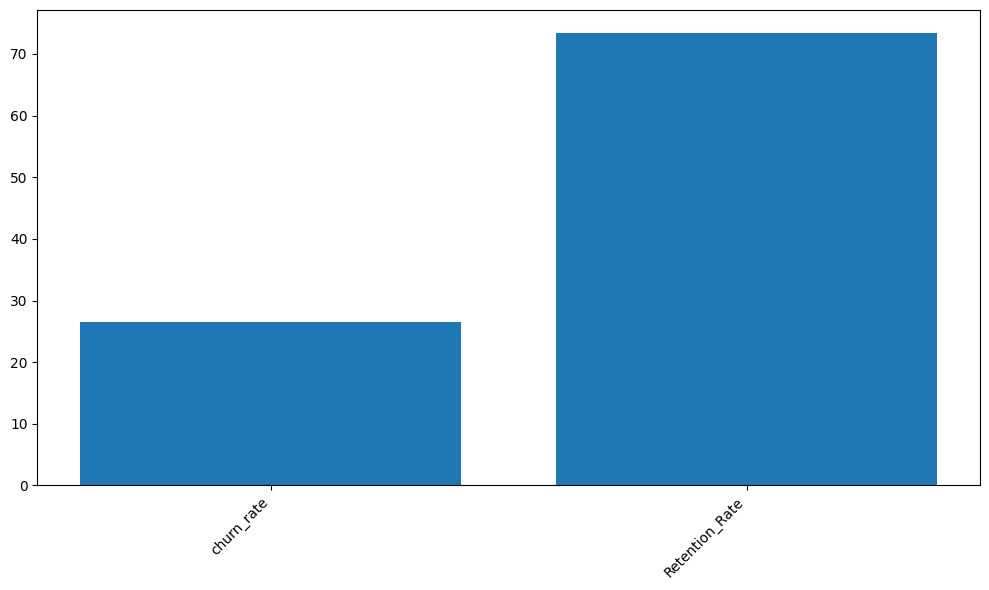

In [126]:
## Convert Spark data frame  to Pandas for visualization

plt.figure(figsize=(10,6))
plt.bar(["churn_rate","Retention_Rate"],[churn_rate,Retention_Rate])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task Five : Churn Rate by Group (Segmented Churn)
Churn Rate by Group
=
(
Churned Customers in Group
Total Customers in Group
)
×
100
Churn Rate by Group=( 
Total Customers in Group
Churned Customers in Group
​
 )×100
Example: churn rate by contract type, payment method, gender, etc.

In [169]:
churn_rate_pay=data.groupBy('Payment Method').agg(
    F.sum(F.col('churn value')).alias('churn_rate'),
    F.count(F.col('CustomerID')).alias('total_customer'),
    F.round(F.col('churn_rate')/F.col('total_customer')*100).alias('churn per pay type')
)
churn_rate_pay.show()


+--------------------+----------+--------------+------------------+
|      Payment Method|churn_rate|total_customer|churn per pay type|
+--------------------+----------+--------------+------------------+
|Credit card (auto...|     232.0|          1522|              15.0|
|        Mailed check|     308.0|          1612|              19.0|
|Bank transfer (au...|     258.0|          1544|              17.0|
|    Electronic check|    1071.0|          2365|              45.0|
+--------------------+----------+--------------+------------------+



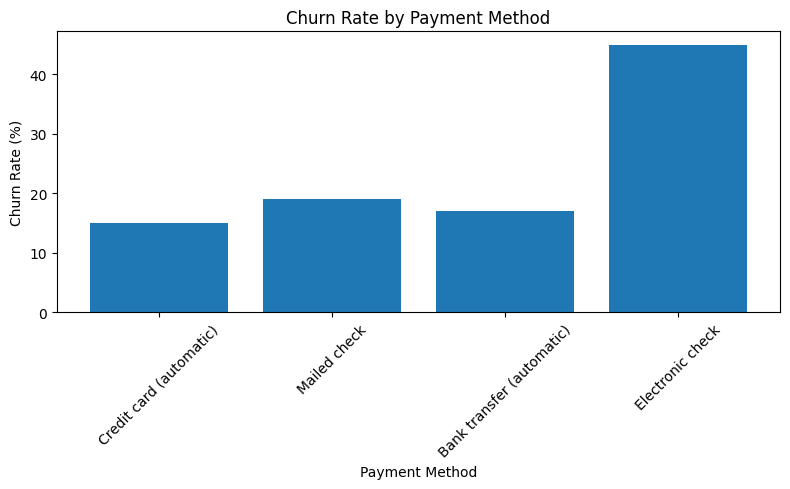

In [170]:
churn_rate_pay_pd = churn_rate_pay.toPandas()

# Plotting
plt.figure(figsize=(8,5))
plt.bar(churn_rate_pay_pd['Payment Method'], churn_rate_pay_pd['churn per pay type'])
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task Five : Churn Rate by Group (Segmented Churn)
Churn Rate by Group
=
(
Churned Customers in Group
Total Customers in Group
)
×
100
Churn Rate by Group=( 
Total Customers in Group
Churned Customers in Group
​
 )×100
Example: churn rate by contract type, payment method, gender, etc.